<a href="https://colab.research.google.com/github/DarkWorldCoder/DiabetesPredictionAssignment/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Data Description

In [ ]:
df = pd.read_csv("diabetes.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
df.shape

(768, 9)

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Below we will detect outliers with the method of IQR


# Data Quality Analysis

In [ ]:
def detecting_outliers(df,column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers



Finding outliers for

In [ ]:
columns = df.drop(columns = ["Outcome"]).columns
columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
for col in columns:
  outliers = detecting_outliers(df,col)
  print(f"{col}: {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.2f}%)")
  print("\n")


Pregnancies: 4 outliers detected (0.52%)


Glucose: 5 outliers detected (0.65%)


BloodPressure: 45 outliers detected (5.86%)


SkinThickness: 1 outliers detected (0.13%)


Insulin: 34 outliers detected (4.43%)


BMI: 19 outliers detected (2.47%)


DiabetesPedigreeFunction: 29 outliers detected (3.78%)


Age: 9 outliers detected (1.17%)




In [ ]:
from scipy import stats

In [ ]:
def treat_outliers_zscore(df,column,threshold=3):
  z_scores = np.abs(stats.zscore(df[column]))
  df[column] = np.where(z_scores > threshold, np.nan, df[column])
  return df

In [ ]:
for col in columns:
  df = treat_outliers_zscore(df,col)
  outliers = (df, col)
  print(f"\nOutliers in {col}:")
  print(f"Number of outliers: {len(outliers)}")
  print(f"Percentage of outliers: {(len(outliers) / len(df)) * 100:.2f}%")



Outliers in Pregnancies:
Number of outliers: 2
Percentage of outliers: 0.26%

Outliers in Glucose:
Number of outliers: 2
Percentage of outliers: 0.26%

Outliers in BloodPressure:
Number of outliers: 2
Percentage of outliers: 0.26%

Outliers in SkinThickness:
Number of outliers: 2
Percentage of outliers: 0.26%

Outliers in Insulin:
Number of outliers: 2
Percentage of outliers: 0.26%

Outliers in BMI:
Number of outliers: 2
Percentage of outliers: 0.26%

Outliers in DiabetesPedigreeFunction:
Number of outliers: 2
Percentage of outliers: 0.26%

Outliers in Age:
Number of outliers: 2
Percentage of outliers: 0.26%


Now, let's assume the inconsistencies

In [ ]:
# Let's check for zero value in different column

zero_values = {
    "Glucose": len(df[df["Glucose"] == 0]),
    "BloodPressure": len(df[df["BloodPressure"] == 0]),
    "SkinThickness": len(df[df["SkinThickness"] == 0]),
    "Insulin": len(df[df["Insulin"] == 0]),
    "BMI": len(df[df["BMI"] == 0]),
}

# as zero value in this column doesnt make any sense

for col, count in zero_values.items():
    if count > 0:
        print(f"{col}: {count} zero values")


SkinThickness: 227 zero values
Insulin: 374 zero values


# Data Pre-Procesisng

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

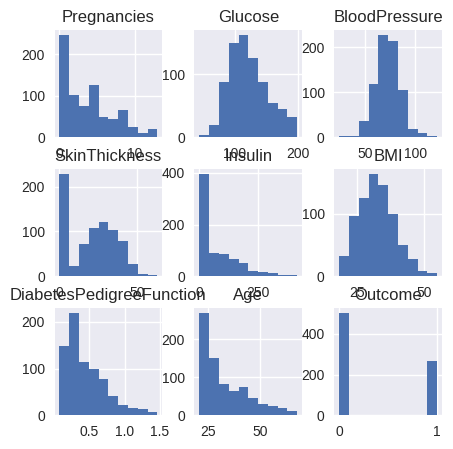

In [ ]:
# find distributios of different column
df.hist(figsize = (5,5))

In [ ]:
median_skew = ["Glucose","BloodPressure","BMI"]
mean_skew = ["Pregnancies","Age"]
for col in median_skew:
  df[col].fillna(df[col].median(),inplace=True)
for col in mean_skew:
  df[col].fillna(df[col].mean(),inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df['DiabetesPedigreeFunction'] = oe.fit_transform(df[['DiabetesPedigreeFunction']])

In [ ]:
knn_features = ["Insulin","SkinThickness"]


In [ ]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
df[knn_features] = knn_imputer.fit_transform(df[knn_features])

In [ ]:
# now we have identified outliers and calculate the perence now we will treat ourliers
def treat_outliers_iqr(df,column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), np.nan, df[column])
  return df


In [ ]:
# DROP NA
df.dropna(inplace=True)

In [ ]:
for col in columns:
  df = treat_outliers_iqr(df,col)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_mm = MinMaxScaler()
df[["Age","BMI"]] = scaler_mm.fit_transform(df[["Age","BMI"]])

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler = StandardScaler()
numerical_features = ["Glucose","BloodPressure","SkinThickness","Insulin"]
df[numerical_features] = std_scaler.fit_transform(df[numerical_features])

# Data Visualization

In [ ]:
df.fillna(df["Glucose"].mean(),inplace=True)
df.fillna(df["Insulin"].mean(),inplace=True)
df.fillna(df["SkinThickness"].mean(),inplace=True)
df.fillna(df["BMI"].mean(),inplace=True)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-168-b732732b6e42>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


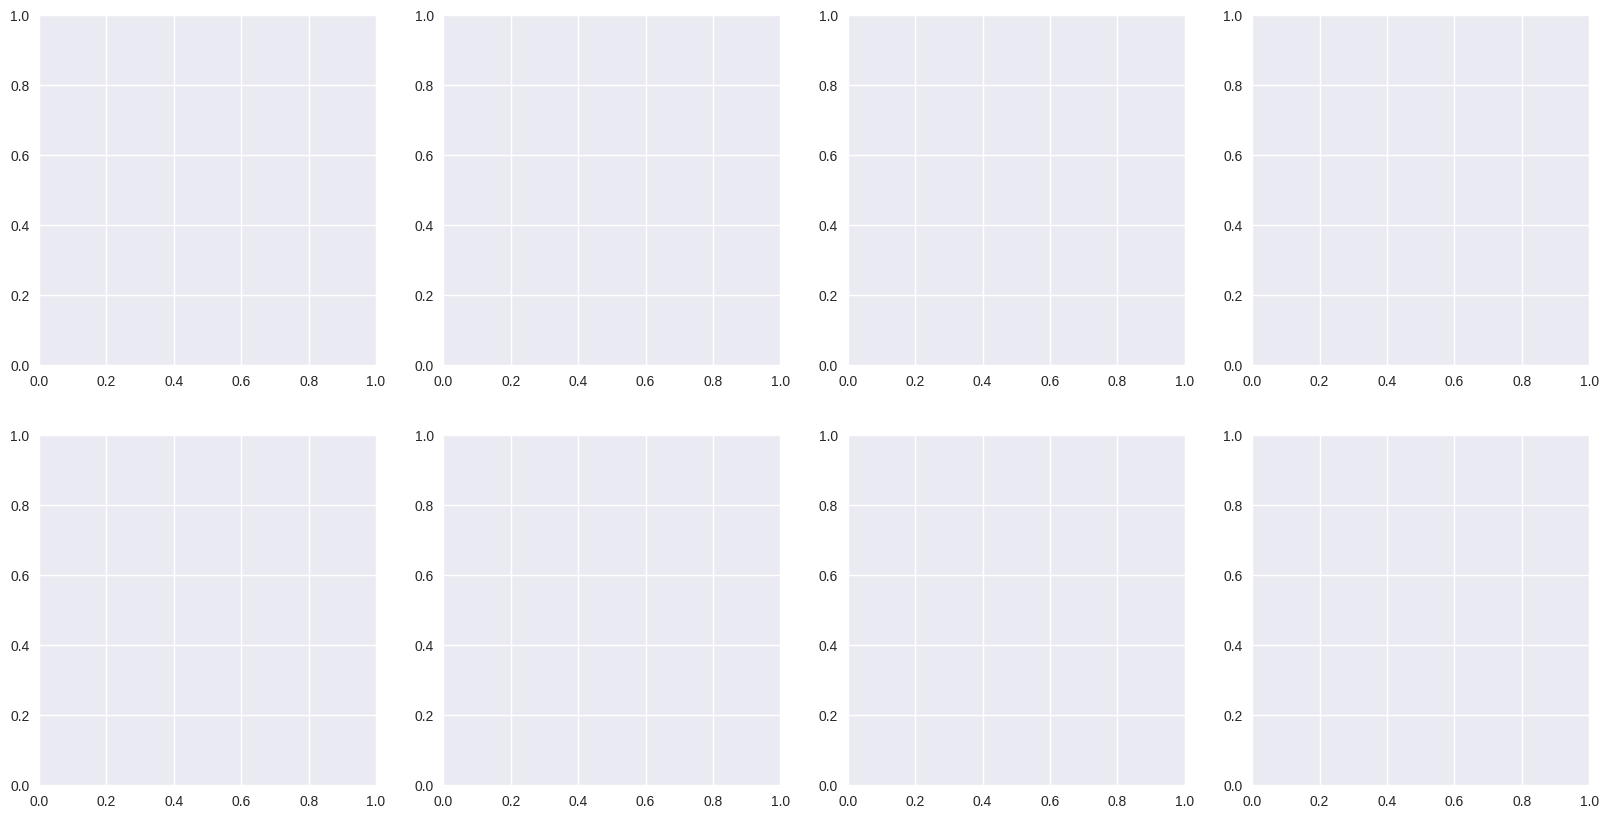

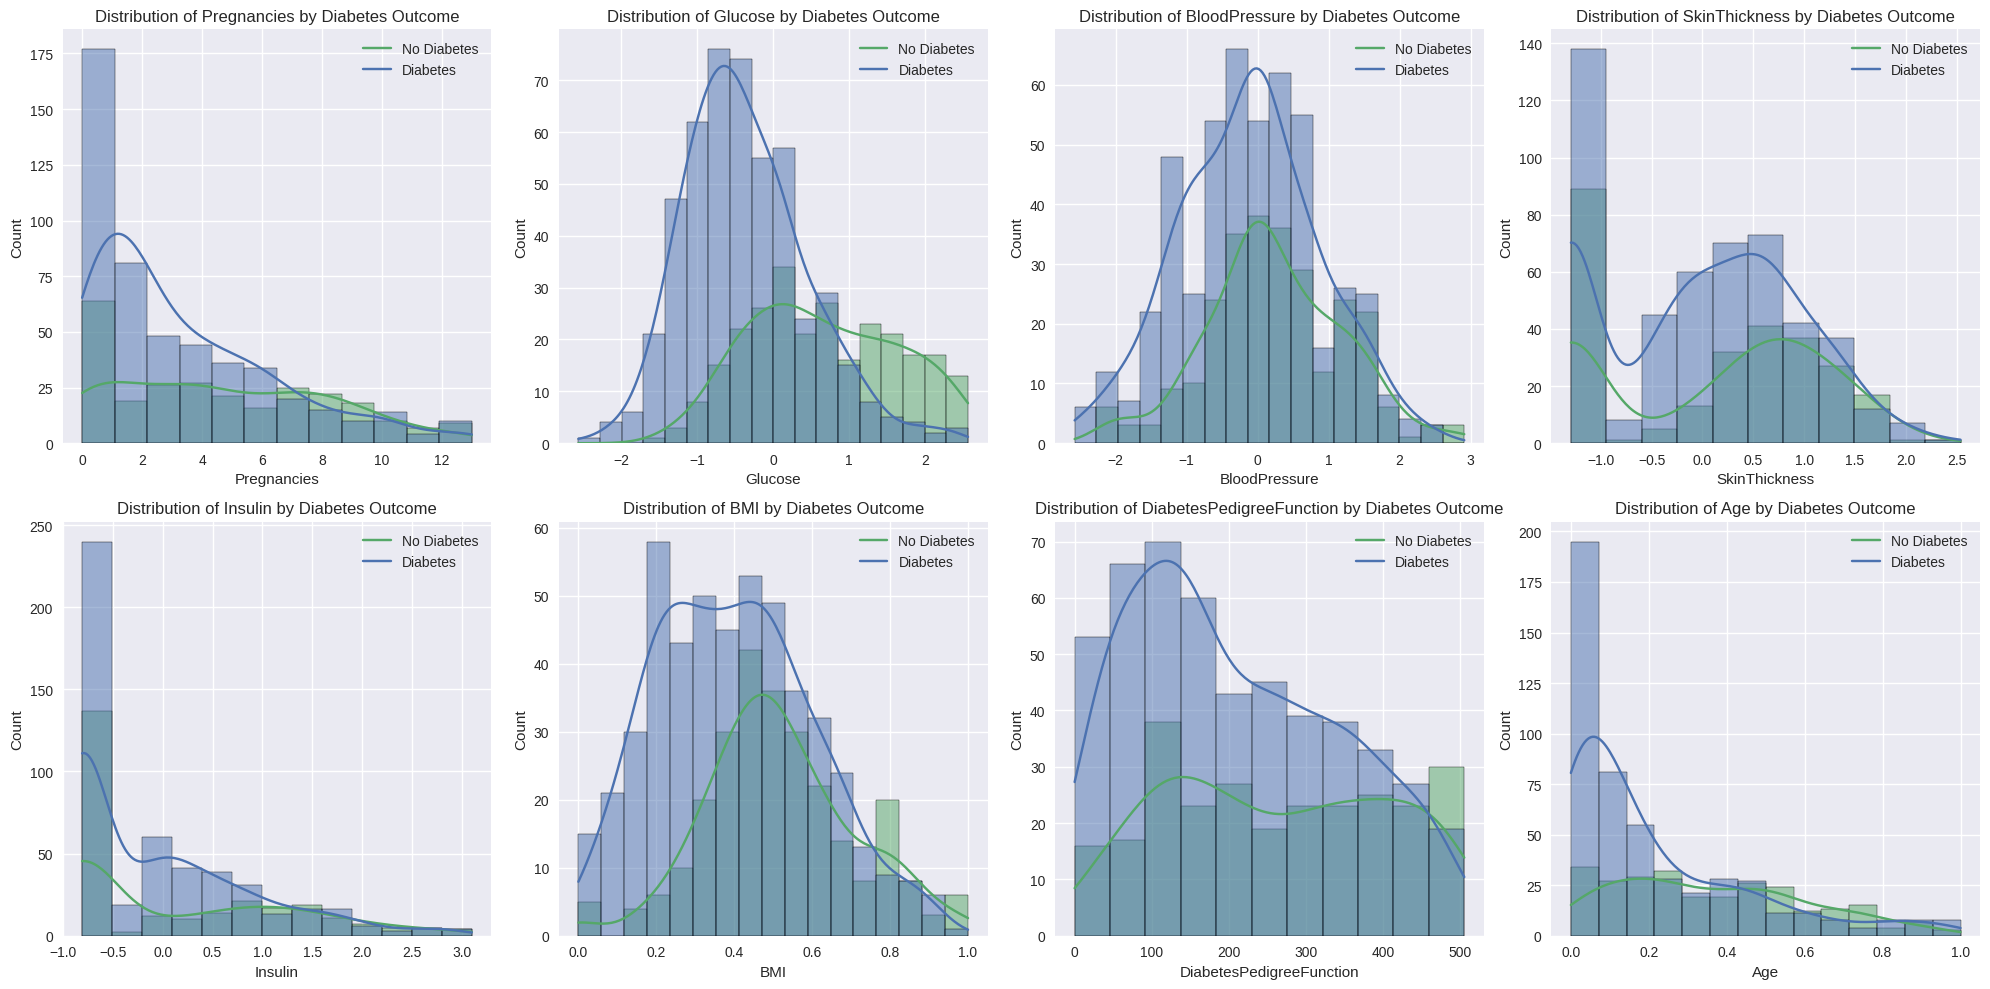

In [ ]:
fig,axes = plt.subplots(
    nrows = 2,
    ncols = 4,
    figsize = (20,10)
)
plt.style.use('seaborn')

fig, axes = plt.subplots(
    nrows=2,
    ncols=4,
    figsize=(20, 10)
)
axes = axes.ravel()

for idx, col in enumerate(df.drop(
    columns=['Outcome']
).columns):  # Exclude the 'Outcome' column
    sns.histplot(data=df, x=col, hue='Outcome', kde=True, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col} by Diabetes Outcome')
    axes[idx].legend(labels=['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.show()


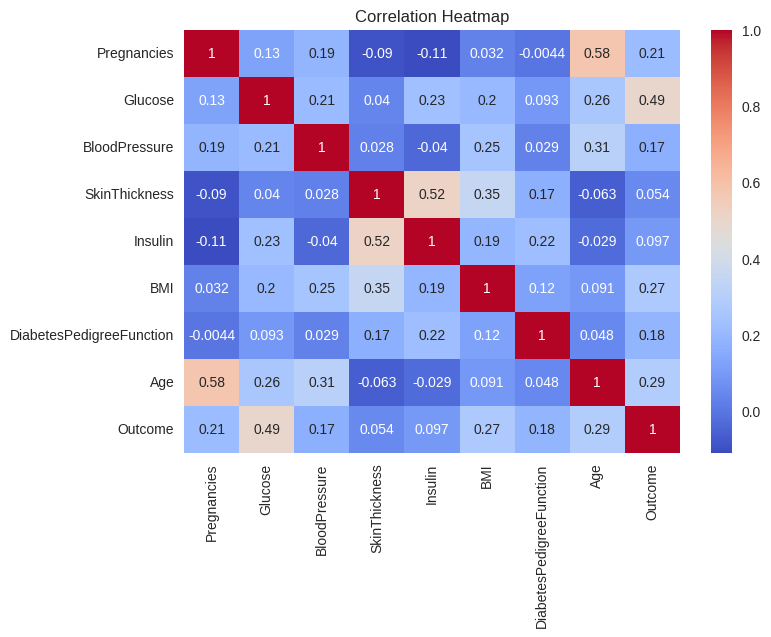

In [ ]:
# correlation heatmap

corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

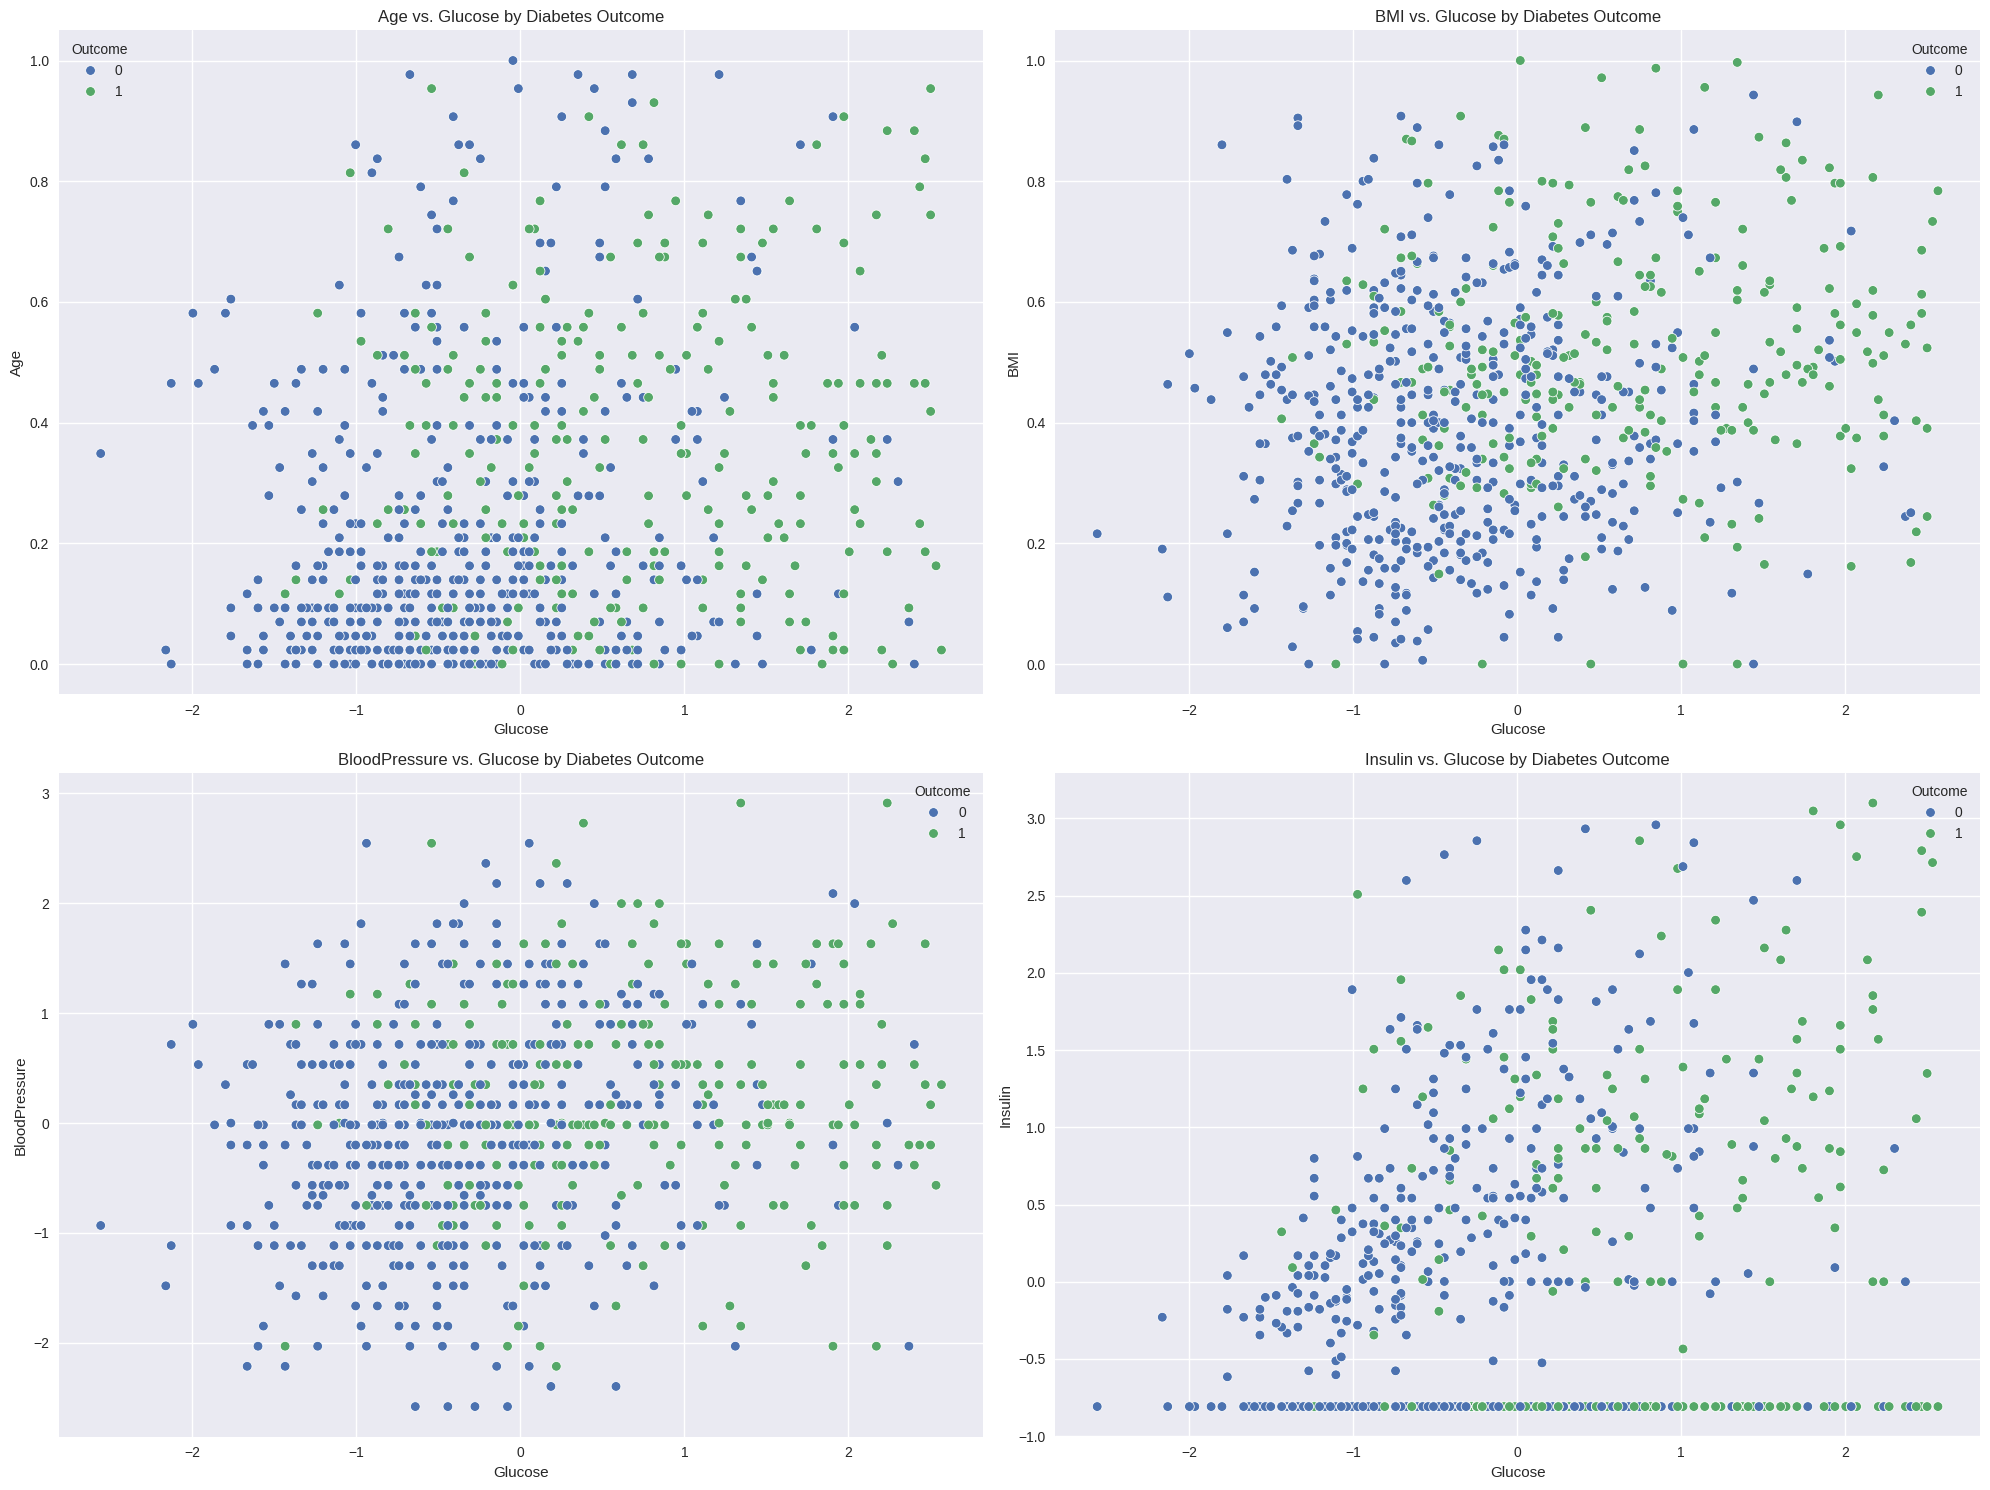

In [ ]:
# scatter plot

fig, axes = plt.subplots(2, 2, figsize=(20, 15))
axes = axes.ravel()

for idx, feature in enumerate(['Age', 'BMI', 'BloodPressure', 'Insulin']):
    sns.scatterplot(data=df, x='Glucose', y=feature, hue='Outcome', ax=axes[idx])
    axes[idx].set_title(f'{feature} vs. Glucose by Diabetes Outcome')

plt.tight_layout()
plt.show()

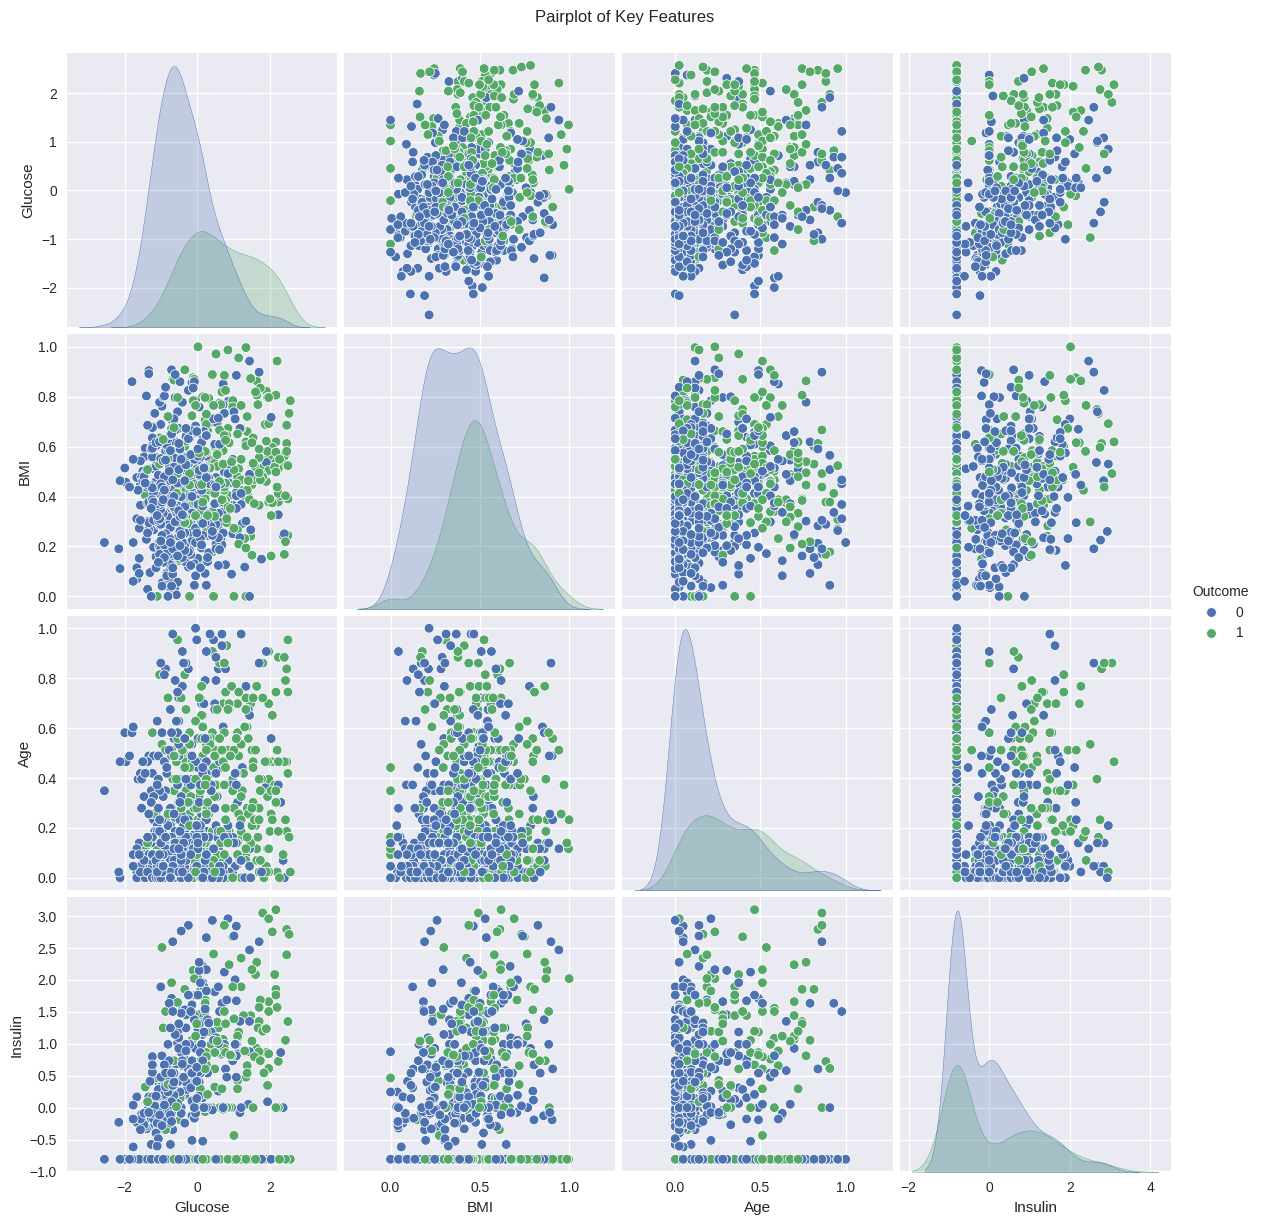

In [ ]:
sns.pairplot(df[['Glucose', 'BMI', 'Age', 'Insulin', 'Outcome']], hue='Outcome', height=3)
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

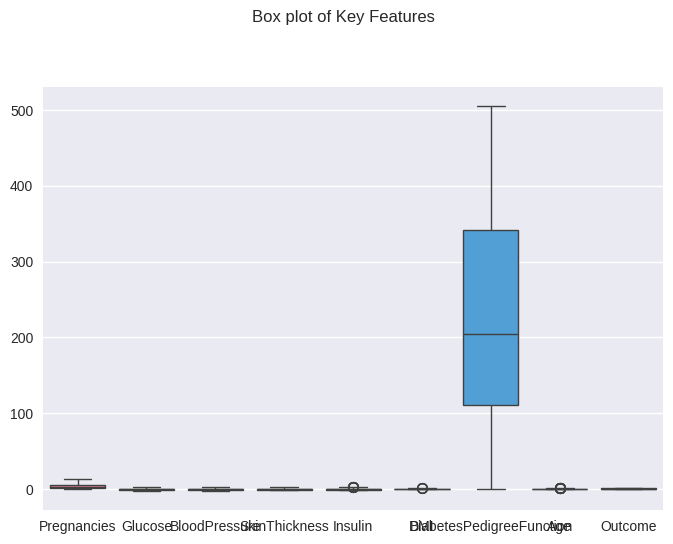

In [ ]:
# Box plot
sns.boxplot(data=df)
plt.suptitle('Box plot of Key Features', y=1.02)
plt.show()

# Statical Analysis

In [ ]:
df.describe()

Pregnancies       Glucose  BloodPressure  SkinThickness       Insulin  \
count   757.000000  7.570000e+02   7.570000e+02   7.570000e+02  7.570000e+02   
mean      3.813932  9.620955e-17   2.452170e-16  -6.218422e-17  9.914277e-17   
std       3.273667  1.000661e+00   9.913648e-01   1.000661e+00  9.886927e-01   
min       0.000000 -2.559010e+00  -2.579222e+00  -1.294603e+00 -8.083069e-01   
25%       1.000000 -7.400394e-01  -7.487985e-01  -1.294603e+00 -8.083069e-01   
50%       3.000000 -1.447400e-01  -1.662902e-02   1.746840e-01 -4.354748e-01   
75%       6.000000  6.159204e-01   7.155405e-01   7.496224e-01  6.701654e-01   
max      13.000000  2.567180e+00   2.912049e+00   2.538319e+00  3.100003e+00   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                757.000000  757.000000  757.000000  
mean     0.439722                226.439894    0.264537    0.348745  
std      0.206018                139.979772    0.249077    0.476888  
min      0.000000                  0.000000    0.000000    0.000000  
25%      0.292063                111.000000    0.069767    0.000000  
50%      0.444444                205.000000    0.186047    0.000000  
75%      0.568254                341.000000    0.418605    1.000000  
max      1.000000                505.000000    1.000000    1.000000

In [ ]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127731       0.185891      -0.089685   
Glucose                      0.127731  1.000000       0.210669       0.039523   
BloodPressure                0.185891  0.210669       1.000000       0.027796   
SkinThickness               -0.089685  0.039523       0.027796       1.000000   
Insulin                     -0.110200  0.229146      -0.040284       0.516867   
BMI                          0.032396  0.204488       0.246212       0.353635   
DiabetesPedigreeFunction    -0.004377  0.093091       0.029118       0.171131   
Age                          0.575811  0.258359       0.308562      -0.062978   
Outcome                      0.211200  0.492977       0.170570       0.054167   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.110200  0.032396                 -0.004377   
Glucose                   0.229146  0.204488                  0.093091   
BloodPressure            -0.040284  0.246212                  0.029118   
SkinThickness             0.516867  0.353635                  0.171131   
Insulin                   1.000000  0.189808                  0.220571   
BMI                       0.189808  1.000000                  0.120348   
DiabetesPedigreeFunction  0.220571  0.120348                  1.000000   
Age                      -0.029500  0.090912                  0.048451   
Outcome                   0.097225  0.269704                  0.184991   

                               Age   Outcome  
Pregnancies               0.575811  0.211200  
Glucose                   0.258359  0.492977  
BloodPressure             0.308562  0.170570  
SkinThickness            -0.062978  0.054167  
Insulin                  -0.029500  0.097225  
BMI                       0.090912  0.269704  
DiabetesPedigreeFunction  0.048451  0.184991  
Age                       1.000000  0.286419  
Outcome                   0.286419  1.000000

In [ ]:
df.skew()

Pregnancies                 0.817273
Glucose                     0.538438
BloodPressure               0.040841
SkinThickness              -0.036430
Insulin                     1.037049
BMI                         0.205997
DiabetesPedigreeFunction    0.290019
Age                         0.982468
Outcome                     0.636022
dtype: float64

In [ ]:
df.kurtosis()

Pregnancies                -0.160651
Glucose                    -0.235508
BloodPressure              -0.087461
SkinThickness              -1.227020
Insulin                     0.130223
BMI                        -0.336566
DiabetesPedigreeFunction   -1.077907
Age                         0.084061
Outcome                    -1.599710
dtype: float64

In [ ]:
# Shapiro -wilk Normality test

for col in df.columns:
  stat,p = stats.shapiro(df[col])
  print(f"{col}: {stat:.3f}, {p:.3f}")


Pregnancies: 0.908, 0.000
Glucose: 0.970, 0.000
BloodPressure: 0.994, 0.004
SkinThickness: 0.902, 0.000
Insulin: 0.805, 0.000
BMI: 0.992, 0.000
DiabetesPedigreeFunction: 0.952, 0.000
Age: 0.883, 0.000
Outcome: 0.602, 0.000


In [ ]:
# Anova for "Age" groups
age_groups = pd.cut(df['Age'], bins=[0,30,45,60,np.inf], labels=['Young', 'Middle', 'Senior', 'Elderly'])
age_groups_list = [group for _,group in df.groupby(age_groups)["Glucose"]]
f_statistic, p_value = stats.f_oneway(*age_groups_list)
print(f"F-statistic: {f_statistic:.3f}, p-value: {p_value:.3f}")


F-statistic: nan, p-value: nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


In [ ]:
# T-test
for col in df.drop(columns = ["Outcome"]).columns:
  stat,p = stats.ttest_ind(df[df["Outcome"] == 0][col],df[df["Outcome"] == 1][col])
  print(f"{col}: {stat:.3f}, {p:.3f}")


Pregnancies: -5.937, 0.000
Glucose: -15.569, 0.000
BloodPressure: -4.757, 0.000
SkinThickness: -1.491, 0.136
Insulin: -2.684, 0.007
BMI: -7.696, 0.000
DiabetesPedigreeFunction: -5.172, 0.000
Age: -8.214, 0.000


# Model Training and Hyper parameter tuning

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [ ]:
X_train,X_test,y_train,y_test=  train_test_split(df.drop(columns = ["Outcome"]),df["Outcome"],test_size=0.2,random_state=42)

In [ ]:
knn = KNeighborsClassifier()
nb = GaussianNB()
rf = RandomForestClassifier()
svm = SVC()
lr = LogisticRegression()

In [ ]:

# df["Insulin"] = df.fillna(df["Insulin"].mean())
# df["SkinThickness"] = df.fillna(df["SkinThickness"].mean())
# df["BMI"] = df.fillna(df["BMI"].mean())

In [ ]:
df

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0            6.0  0.880498      -0.016629       0.941268 -0.808307  0.488889   
1            1.0 -1.203050      -0.565756       0.557976 -0.808307  0.266667   
2            8.0  2.038025      -0.748799      -1.294603 -0.808307  0.161905   
3            1.0 -1.070761      -0.565756       0.174684  0.400184  0.314286   
5            5.0 -0.177812       0.166413      -1.294603 -0.808307  0.234921   
..           ...       ...            ...            ...       ...       ...   
763         10.0 -0.673895       0.349456       1.771735  1.505824  0.466667   
764          2.0  0.020621      -0.199671       0.430212 -0.808307  0.590476   
765          5.0 -0.012451      -0.016629       0.174684  0.631597  0.253968   
766          1.0  0.152910      -1.114883      -1.294603 -0.808307  0.377778   
767          1.0 -0.938473      -0.199671       0.685740 -0.808307  0.387302   

     DiabetesPedigreeFunction       Age  Outcome  
0                       350.0  0.674419        1  
1                       196.0  0.232558        0  
2                       368.0  0.255814        1  
3                        53.0  0.000000        0  
5                        80.0  0.209302        0  
..                        ...       ...      ...  
763                      55.0  0.976744        0  
764                     187.0  0.139535        0  
765                     115.0  0.209302        0  
766                     195.0  0.604651        1  
767                     169.0  0.046512        0  

[757 rows x 9 columns]

In [ ]:
knn.fit(X_train,y_train)
knn_y_predict = knn.predict(X_test)
# scoore
print(f"KNN score: {knn.score(X_test,y_test)}")
# accuracy score
from sklearn.metrics import accuracy_score
print(f"KNN accuracy score: {accuracy_score(y_test,knn_y_predict)}")

KNN score: 0.6381578947368421
KNN accuracy score: 0.6381578947368421


In [ ]:
nb.fit(X_train,y_train)
nb_y_predict = nb.predict(X_test)
# scoore
print(f"NB score: {nb.score(X_test,y_test)}")

NB score: 0.7763157894736842


In [ ]:
rf.fit(X_train,y_train)
rf_y_predict = rf.predict(X_test)
# scoore
print(f"RF score: {rf.score(X_test,y_test)}")

RF score: 0.7631578947368421


In [ ]:
svm.fit(X_train,y_train)
svm_y_predict = svm.predict(X_test)
# scoore
print(f"SVM score: {svm.score(X_test,y_test)}")

SVM score: 0.631578947368421


In [ ]:
lr.fit(X_train,y_train)
lr_y_predict = lr.predict(X_test)
# scoore
print(f"LR score: {lr.score(X_test,y_test)}")

LR score: 0.7828947368421053


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [ ]:
knn_params = {
    "n_neighbors": [3,5,7,9],
    "weights": ["uniform","distance"],
    "metric": ["euclidean","manhattan"]
}

# randomized search
knn_random = RandomizedSearchCV(knn,knn_params,cv=5,n_iter=10,random_state=42)
knn_random.fit(X_train,y_train)
knn_random.best_params_


{'weights': 'distance', 'n_neighbors': 5, 'metric': 'manhattan'}

In [ ]:
# grid search
knn_grid = GridSearchCV(knn,knn_params,cv=5)
knn_grid.fit(X_train,y_train)
knn_grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [ ]:
# Naivebayes parameter tuning
nb_params = {
    "var_smoothing": np.logspace(0,-9, num=100)
}
nb_grid = GridSearchCV(nb,nb_params,cv=5)
nb_grid.fit(X_train,y_train)
nb_grid.best_params_

{'var_smoothing': 5.336699231206302e-08}

In [ ]:
nb_random = RandomizedSearchCV(nb,nb_params,cv=5,n_iter=10,random_state=42)
nb_random.fit(X_train,y_train)
nb_random.best_params_

{'var_smoothing': 2.848035868435799e-08}

In [ ]:
# random forest tuning
rf_params = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_grid = GridSearchCV(rf,rf_params,cv=5)
rf_grid.fit(X_train,y_train)
rf_grid.best_params_


{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 100}

In [ ]:
# randomized search
rf_random = RandomizedSearchCV(rf,rf_params,cv=5,n_iter=10,random_state=42)
rf_random.fit(X_train,y_train)
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 10}

In [ ]:
# svc tuning
svm_params = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}
svm_grid = GridSearchCV(svm,svm_params,cv=5)
svm_grid.fit(X_train,y_train)
svm_grid.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [ ]:
# randomized
svm_random = RandomizedSearchCV(svm,svm_params,cv=5,n_iter=10,random_state=42)
svm_random.fit(X_train,y_train)
svm_random.best_params_

{'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}

In [ ]:
# logisitics regression params
lr_params = {
    "penalty": ["l1", "l2"],
    "C": [0.1, 1, 10],
}
lr_grid = GridSearchCV(lr,lr_params,cv=5)
lr_grid.fit(X_train,y_train)
lr_grid.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 0.1, 'penalty': 'l2'}

In [ ]:
random_lr = RandomizedSearchCV(lr,lr_params,cv=5,n_iter=10,random_state=42)
random_lr.fit(X_train,y_train)
random_lr.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown i

{'penalty': 'l2', 'C': 0.1}

# Cross validation


In [ ]:
from sklearn.model_selection import cross_val_score, KFold,StratifiedKFold

In [ ]:
# knn with cross validation
k_fold = KFold(n_splits=5,shuffle=True,random_state=42)
knn_scores = cross_val_score(knn,X_train,y_train,cv=k_fold)
print(f"KNN score: {knn_scores}")

KNN score: [0.66115702 0.69421488 0.62809917 0.58677686 0.68595041]


In [ ]:
stratified_k_fold = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)

In [ ]:
knn_s_kfold = cross_val_score(knn,X_train,y_train,cv=stratified_k_fold)
print(f"KNN score: {knn_s_kfold}")

KNN score: [0.66115702 0.60330579 0.61157025 0.66115702 0.58677686]


In [ ]:
nb_kfold = cross_val_score(nb,X_train,y_train,cv=k_fold)
print(f"NB score: {nb_kfold}")

NB score: [0.76859504 0.80165289 0.73553719 0.69421488 0.68595041]


In [ ]:
nb_s_kfold = cross_val_score(nb,X_train,y_train,cv=stratified_k_fold)
print(f"NB score: {nb_kfold}")

NB score: [0.76859504 0.80165289 0.73553719 0.69421488 0.68595041]


In [ ]:
rf_kfold = cross_val_score(rf,X_train,y_train,cv=k_fold)
print(f"RF score: {rf_kfold}")

RF score: [0.76033058 0.82644628 0.76859504 0.74380165 0.76033058]


In [ ]:
rf_s_kfold = cross_val_score(rf,X_train,y_train,cv=stratified_k_fold)
print(f"RF score: {rf_s_kfold}")

RF score: [0.69421488 0.74380165 0.71900826 0.74380165 0.76859504]


In [ ]:
svm_kfold = cross_val_score(svm,X_train,y_train,cv=k_fold)
print(f"SVM score: {svm_kfold}")


SVM score: [0.68595041 0.63636364 0.66115702 0.66115702 0.6446281 ]


In [ ]:
svm_s_kfold = cross_val_score(svm,X_train,y_train,cv=stratified_k_fold)
print(f"SVM score: {svm_s_kfold}")

SVM score: [0.66115702 0.66942149 0.66115702 0.65289256 0.61983471]


In [ ]:
lr_kfold = cross_val_score(lr,X_train,y_train,cv=k_fold)
print(f"LR score: {lr_kfold}")

LR score: [0.79338843 0.79338843 0.7107438  0.76859504 0.70247934]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
lr_s_kfold = cross_val_score(lr,X_train,y_train,cv=stratified_k_fold)
print(f"LR score: {lr_s_kfold}")

LR score: [0.75206612 0.76859504 0.73553719 0.80991736 0.74380165]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Metrics Evaluation


In [ ]:
# confusion matric
from sklearn.metrics import confusion_matrix,f1_score,roc_auc_score,accuracy_score,recall_score



In [ ]:
knn_cm = confusion_matrix(y_test,knn_y_predict)
print(f"KNN confusion matrix: \n{knn_cm}")

KNN confusion matrix: 
[[79 18]
 [37 18]]


In [ ]:
rf_cm = confusion_matrix(y_test,rf_y_predict)
print(f"RF confusion matrix: \n{rf_cm}")

RF confusion matrix: 
[[83 14]
 [22 33]]


In [ ]:
nb_cm = confusion_matrix(y_test,nb_y_predict)
print(f"NB confusion matrix: \n{nb_cm}")

NB confusion matrix: 
[[80 17]
 [17 38]]


In [ ]:
svm_cm = confusion_matrix(y_test,svm_y_predict)
print(f"SVM confusion matrix: \n{svm_cm}")

SVM confusion matrix: 
[[87 10]
 [46  9]]


In [ ]:
lr_cm = confusion_matrix(y_test,lr_y_predict)
print(f"LR confusion matrix: \n{lr_cm}")

LR confusion matrix: 
[[84 13]
 [20 35]]


In [ ]:
knn_acc = accuracy_score(y_test,knn_y_predict)
print(f"KNN accuracy score: {knn_acc}")

KNN accuracy score: 0.6381578947368421


In [ ]:
rf_acc = accuracy_score(y_test,rf_y_predict)
print(f"RF accuracy score: {rf_acc}")

RF accuracy score: 0.7631578947368421


In [ ]:
nb_acc = accuracy_score(y_test,nb_y_predict)
print(f"NB accuracy score: {nb_acc}")

NB accuracy score: 0.7763157894736842


In [ ]:
svm_acc = accuracy_score(y_test,svm_y_predict)
print(f"SVM accuracy score: {svm_acc}")


SVM accuracy score: 0.631578947368421


In [ ]:
lr_acc = accuracy_score(y_test,lr_y_predict)
print(f"LR accuracy score: {lr_acc}")

LR accuracy score: 0.7828947368421053


In [ ]:
knn_recall = recall_score(y_test,knn_y_predict)
print(f"KNN recall score: {knn_recall}")

KNN recall score: 0.32727272727272727


In [ ]:
rf_recall = recall_score(y_test,rf_y_predict)
print(f"RF recall score: {rf_recall}")

RF recall score: 0.6


In [ ]:
nb_recall = recall_score(y_test,nb_y_predict)
print(f"NB recall score: {nb_recall}")

NB recall score: 0.6909090909090909


In [ ]:
svm_recall = recall_score(y_test,svm_y_predict)
print(f"SVM recall score: {svm_recall}")

SVM recall score: 0.16363636363636364


In [ ]:
lr_recall = recall_score(y_test,lr_y_predict)
print(f"LR recall score: {lr_recall}")

LR recall score: 0.6363636363636364


In [ ]:
knn_f1 = f1_score(y_test,knn_y_predict)
print(f"KNN f1 score: {knn_f1}")


KNN f1 score: 0.3956043956043956


In [ ]:
nb_f1 = f1_score(y_test,nb_y_predict)
print(f"NB f1 score: {nb_f1}")

NB f1 score: 0.6909090909090909


In [ ]:
rf_f1 = f1_score(y_test,rf_y_predict)
print(f"RF f1 score: {rf_f1}")

RF f1 score: 0.6470588235294118


In [ ]:
svm_f1 = f1_score(y_test,svm_y_predict)
print(f"SVM f1 score: {svm_f1}")

SVM f1 score: 0.24324324324324323


In [ ]:
lr_f1 = f1_score(y_test,lr_y_predict)
print(f"LR f1 score: {lr_f1}")

LR f1 score: 0.6796116504854369


In [ ]:
knn_roc_auc = roc_auc_score(y_test,knn_y_predict)
print(f"KNN roc_auc score: {knn_roc_auc}")

KNN roc_auc score: 0.5708528584817245


In [ ]:
nb_roc_auc = roc_auc_score(y_test,nb_y_predict)
print(f"NB roc_auc score: {nb_roc_auc}")

NB roc_auc score: 0.757825679475164


In [ ]:
rf_roc_auc = roc_auc_score(y_test,rf_y_predict)
print(f"RF roc_auc score: {rf_roc_auc}")

RF roc_auc score: 0.7278350515463918


In [ ]:
svm_roc_auc = roc_auc_score(y_test,svm_y_predict)
print(f"SVM roc_auc score: {svm_roc_auc}")

SVM roc_auc score: 0.5302717900656044


In [ ]:
lr_roc_auc = roc_auc_score(y_test,lr_y_predict)
print(f"LR roc_auc score: {lr_roc_auc}")

LR roc_auc score: 0.7511715089034676


# Model Interpretation

In [ ]:
# knn feature importnace and plot


AttributeError: 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=da96a8c490b5e60b9df8b609384b7ab68271349c150c36709f02aeab451457e4
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime.lime_tabular import LimeTabularExplainer

class_names = ['No Diabetes', 'Diabetes']

feature_names = df.drop(columns=['Outcome']).columns
explainer = LimeTabularExplainer(X_train.values, feature_names=feature_names, class_names=class_names, mode='classification')



In [ ]:
# show lime tabuler explainer
exp = explainer.explain_instance(X_test.iloc[0], knn.predict_proba, num_features=5)
exp.show_in_notebook(show_table=True)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 3.1 MB/s eta 0:00:00


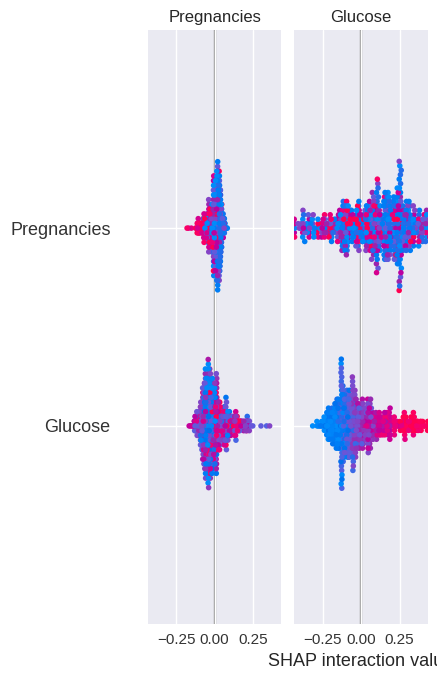

In [ ]:
import shap

shap.initjs()

shap_values = shap.TreeExplainer(rf).shap_values(X_train)
shap.summary_plot(shap_values, X_train)

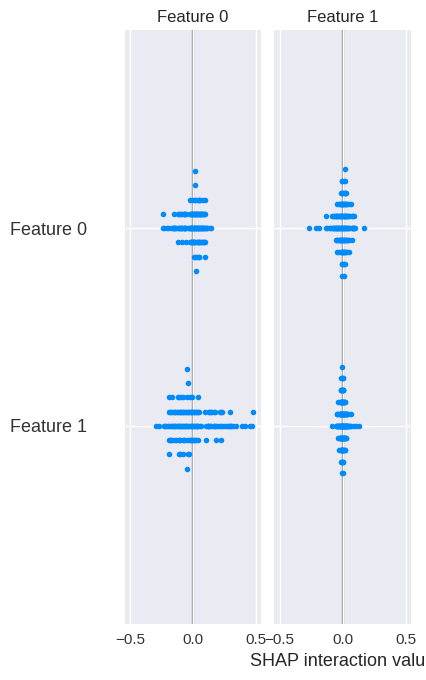